In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

import warnings
warnings.filterwarnings("ignore")

## One-step methods

In [25]:
forward_Euler = lambda t_c, y: y + dt*f(t_c-dt, y)

In [ ]:
backward_Euler = lambda t_c, y: newton(lambda x: x - y - dt*f(t_c, x), y)

In [ ]:
Crank_Nicolson = lambda t_c, y: newton(lambda x: x - y - dt/2 * (f(t_c-dt, y) + f(t_c, x)), y)

In [ ]:
heun = lambda t_c, y: y + dt/2 * (f(t_c-dt, y) + f(t_c, forward_Euler(t_c-dt, y)))

In [ ]:
def RK_4(t_c, y):
    K1 = f(t_c-dt, y)
    K2 = f(t_c-dt + dt/2, y + dt/2*K1)
    K3 = f(t_c-dt + dt/2, y + dt/2*K2)
    K4 = f(t_c-dt + dt, y + dt*K3)
    
    return y + dt/6 * (K1 + 2*K2 + 2*K3 + K4)

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Adam's methods</h1>

## Adam-Bashfort methods

In [26]:
AB_0 = lambda t_c, y_t: forward_Euler(t_c, y_t[-1])

In [27]:
AB_1 = lambda t_c, y_t: y_t[-1] + dt/2 * (3*f(t_c-dt, y_t[-1]) - f(t_c-2*dt, y_t[-2]))

In [28]:
AB_2 = lambda t_c, y_t: y_t[-1] + dt/12 * (23*f(t_c-dt, y_t[-1]) - 16*f(t_c-2*dt, y_t[-2]) + 5*f(t_c-3*dt, y_t[-3]))

In [29]:
AB_3 = lambda t_c, y_t: y_t[-1] + dt/24 * (55*f(t_c-dt, y_t[-1]) - 59*f(t_c-2*dt, y_t[-2]) + \
                                             + 37*f(t_c-3*dt, y_t[-3]) - 9*f(t_c-4*dt, y_t[-4]))

## Adam-Moulton methods

In [30]:
AM_0 = lambda t_c, y_t: Crank_Nicolson(t_c, y_t[-1])

In [31]:
AM_1 = lambda t_c, y_t: newton(lambda x: x-y_t[-1]-dt/12 * (5*f(t_c, x) + 8*f(t_c-dt, y_t[-1]) - f(t_c-2*dt, y_t[-2])), y_t[-1])

In [32]:
AM_2 = lambda t_c, y_t: newton(lambda x: x - y_t[-1] - dt/24 * (9*f(t_c, x) + 19*f(t_c-dt, y_t[-1]) \
                                                            - 5*f(t_c-2*dt, y_t[-2]) + f(t_c-3*dt, y_t[-3])), y_t[-1])

In [33]:
AM_3 = lambda t_c, y_t: newton(lambda x: x - y_t[-1] - dt/720 * (251*f(t_c, x) + 646*f(t_c-dt, y_t[-1]) \
                                 - 264*f(t_c-2*dt, y_t[-2]) + 106*f(t_c-3*dt, y_t[-3]) - 19*f(t_c-4*dt, y_t[-4])), y_t[-1])

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Backward finite differences</h1>

In [34]:
BDF_0 = lambda t_c, y_t: newton(lambda x: x - y_t[-1] - dt*f(t_c, x), y_t[-1])

In [35]:
BDF_1 = lambda t_c, y_t: newton(lambda x: x - (4*y_t[-1] - 1*y_t[-2] + 2*dt*f(t_c, x))/3, y_t[-1])

In [36]:
BDF_2 = lambda t_c, y_t: newton(lambda x: x - (18*y_t[-1] - 9*y_t[-2] + 2*y_t[-3] + 6*dt*f(t_c, x))/11, y_t[-1])

In [37]:
BDF_3 = lambda t_c, y_t: newton(lambda x: x - (48*y_t[-1] - 36*y_t[-2] + 16*y_t[-3] - 3*y_t[-4] + 12*dt*f(t_c, x))/25, y_t[-1])

<h1 style="background-color:rgb(181 ,50 ,84);color:white;text-align:center">Testing</h1>

### 1st degree ODEs

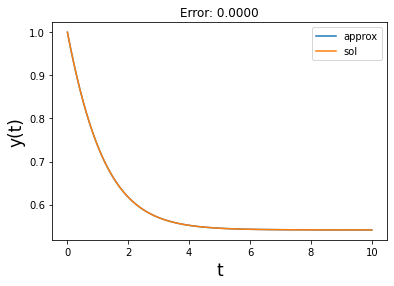

In [38]:
### Functions
fs = [
    (lambda t, y: -y*np.log(y), lambda t: np.exp(-np.exp(np.log(np.log(2))-t)), 0.5),
    (lambda t, y: -np.exp(-(t+y)), lambda t: np.log(np.e + np.exp(-t) - 1), 1),
    (lambda t, y: y*(1-y), lambda t: np.exp(t)/(1+np.exp(t)), 0.5),
    (lambda t, y: 16*y*(1-y), lambda t: (np.exp(16*t - np.log(1023))/(1+np.exp(16*t-np.log(1023)))), 1/1024)
]

### Current function
f, sol, y = fs[1]

### Method used
method = BDF_3

p = 0
if method == AM_1 or method == AB_1 or method == BDF_1:
    p = 1
elif method == AM_2 or method == AB_2 or method == BDF_2:
    p = 2
elif method == AM_3 or method == AB_3 or method == BDF_3:
    p = 3

# Time interval
dt = 0.01

# Time range
t0 = 0
T = 10
t = np.arange(t0, T+dt, dt)

### TAKE OFF
y_t = [y]

for t_c in t[1:p+1]:
    y = RK_4(t_c, y)
    y_t.append(y)

# Algorithm
for t_c in t[p+1:]:
    y = method(t_c, y_t)
    y_t.append(y)
    
plt.plot(t, y_t, label='approx')
plt.plot(t, sol(t), label='sol')

plt.title(f"Error: {np.max(np.abs(y_t - sol(t))):.4f}")
plt.xlabel('t', fontsize = 17)
plt.ylabel('y(t)', fontsize = 17)

plt.legend()
plt.show()

### Order of convergence

Order: 
 [0.         0.         3.96880092 3.98465327 3.99214069]


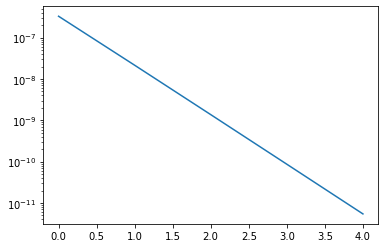

In [39]:
dt = 0.1

iterations = 5
order = np.zeros((iterations,))
err = np.zeros((iterations,))

### Method used
method = AB_3

p = 0
if method == AM_1 or method == AB_1:
    p = 1
elif method == AM_2 or method == AB_2:
    p = 2
else:
    p = 3

for i in range(iterations):
    dt /= 2
    
    t = np.arange(t0, T+dt, dt)
    
    f, sol, y = fs[1]
    
    ### TAKE OFF
    y_t = [y]

    for t_c in t[1:p+1]:
        y = RK_4(t_c, y)
        y_t.append(y)
        
    # Algorithm
    for t_c in t[p+1:]:
        y = method(t_c, y_t)
        y_t.append(y)
        
    err[i] = np.max(np.abs(y_t - sol(t)))
    
    if i > 1:
        order[i] = np.log2(err[i-1]/err[i])

#plt.semilogy(err)

print('Order: \n', order)

### Harmonic oscillator

$$
\begin{bmatrix}
y\\ y'
\end{bmatrix}'=
\begin{bmatrix}
0 & 1 \\ -\omega^2 & 0
\end{bmatrix}
\begin{bmatrix}
y\\ y'
\end{bmatrix}
$$

In [ ]:
# Parameters
x0 = 1
y0 = 4
omega = 0.5

# Oscillator
f = lambda t, y: np.array([[0, 1], [-omega**2, 0]]) @ y

# Solution
sol = lambda t: x0*np.cos(omega*t) + y0*np.sin(omega*t)

### Method used
method = BDF_2

p = 0
if method == AM_1 or method == AB_1 or method == BDF_1:
    p = 1
elif method == AM_2 or method == AB_2 or method == BDF_2:
    p = 2
elif method == AM_3 or method == AB_3 or method == BDF_3:
    p = 3

# Time interval
dt = 0.5

# Time range
t0 = 0
T = 30
t = np.arange(t0, T+dt, dt)

# Initial condition
y = np.array([[x0, y0*omega]])

### TAKE OFF
y_t = y

for t_c in t[1:p+1]:
    y = heun(t_c, y_t[-1])
    y_t = np.append(y_t, [y], axis=0)
        
# Algorithm
for t_c in t[p+1:]:
    y = method(t_c, y_t)
    y_t = np.append(y_t, [y], axis=0)

# Plot
y_tx = y_t[:, 0]

plt.plot(t, y_tx, label='approx')
plt.plot(t, sol(t), label='sol')

plt.title(f"Error: {np.max(np.abs(y_tx - sol(t))):.4f}")
plt.xlabel('t', fontsize = 17)
plt.ylabel('y(t)', fontsize = 17)

plt.legend()
plt.show()

### Lokta-Volterra 

$$y'_1 = \alpha y_1 - \beta y_1y_2$$
$$y'_2 = -\gamma y_2 + \delta y_1y_2$$

$$\alpha = 0.25, \beta = 0.01, \gamma = 1, \delta = 0.01, y_1(0) = 80, y_2(0) = 30, t\in[0,30]$$

In [ ]:
# Function y' = f(t, y(t))
alpha = 0.25
beta = 0.01
gamma = 1
delta = 0.01

f = lambda t, y: np.array([alpha*y[0] - beta*y[0]*y[1], -gamma*y[1] + delta*y[0]*y[1]])

# Time interval
dt = 0.1

# Time range
t0 = 0
T = 30
t = np.arange(t0, T+dt, dt)

### Method used
method = AB_2

p = 0
if method == AM_1 or method == AB_1 or method == BDF_1:
    p = 1
elif method == AM_2 or method == AB_2 or method == BDF_2:
    p = 2
elif method == AM_3 or method == AB_3 or method == BDF_3:
    p = 3

# Initial condition
y = np.array([[80, 30]])

### TAKE OFF
y_t = y

for t_c in t[1:p+1]:
    y = heun(t_c, y_t[-1])
    y_t = np.append(y_t, [y], axis=0)


# Algorithm
for t_c in t[p+1:]:
    y = method(t_c, y_t)
    y_t = np.append(y_t, [y], axis=0)

# Plot of 2d curve
y_tx = y_t[:, 0]
y_ty = y_t[:, 1]

fig = plt.figure(figsize=plt.figaspect(0.3))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot3D(y_tx, y_ty, t, 'green')

ax = fig.add_subplot(1, 2, 2)
ax.plot(y_tx, y_ty)

plt.show()

### Van der Pol

$$y'_1 = y_2 - y_1^3 + y_1$$
$$y_2' = -y_1$$

In [ ]:
# Function 
f = lambda t, y: np.array([y[1] - y[0]**3 + y[0], -y[0]])

# Time interval
dt = 0.1

# Time range
t0 = 0
T = 10
t = np.arange(t0, T+dt, dt)

### Method used
method = AM_1

p = 0
if method == AM_1 or method == AB_1 or method == BDF_1:
    p = 1
elif method == AM_2 or method == AB_2 or method == BDF_2:
    p = 2
elif method == AM_3 or method == AB_3 or method == BDF_3:
    p = 3

# Initial condition
y = np.array([[2, 2]])

### TAKE OFF
y_t = y

for t_c in t[1:p+1]:
    y = heun(t_c, y_t[-1])
    y_t = np.append(y_t, [y], axis=0)

# Algorithm
for t_c in t[p+1:]:
    y = method(t_c, y_t)
    y_t = np.append(y_t, [y], axis=0)

# Plot of 2d curve
y_tx = y_t[:, 0]
y_ty = y_t[:, 1]

fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot3D (y_tx, y_ty, t, 'green')

ax = fig.add_subplot(1, 2, 2)
ax.plot(y_tx, y_ty)

plt.show()